In [22]:
import pandas as pd
import matplotlib.pyplot as plt
datafile = "NREGA.csv"

df = pd.read_csv(datafile)
df.head(3)

,SNo.,state_name,district_name,Total No. of JobCards issued,Total No. of Workers,Total No. of Active Job Cards,Total No. of Active Workers,SC workers against active workers,ST workers against active workers,Approved Labour Budget,...,Total No. of Works Takenup (New+Spill Over),Number of Ongoing Works,Number of Completed Works,% of NRM Expenditure(Public + Individual),% of Category B Works,% of Expenditure on Agriculture & Agriculture Allied Works,Total Exp(Rs. in Lakhs.),Wages(Rs. In Lakhs),Material and skilled Wages(Rs. In Lakhs),Total Adm Expenditure (Rs. in Lakhs.)
0,1,ANDAMAN AND NICOBAR,NICOBARS,6173,9866,1007,2011,0,1678,34000,...,172,172,0,95.68,5,4.32,5.470080,5.47008,0.000000,0.0
1,2,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,18521,29500,6477,11920,0,0,76000,...,532,458,74,43.53,41,29.34,167.966502,162.73531,5.231192,0.0
2,3,ANDAMAN AND NICOBAR,SOUTH ANDAMAN,13726,17491,3420,5016,0,0,40000,...,401,174,227,14.10,44,16.50,79.200820,75.12606,1.374760,2.7


In [23]:
# get column names
for col in df.columns:
    print(col)

SNo.
state_name
district_name
Total No. of JobCards issued
Total No. of Workers
Total No. of Active Job Cards
Total No. of Active Workers
SC workers against active workers
ST workers against active workers
Approved Labour Budget
Persondays of Central Liability so far
SC persondays
ST persondays
Women Persondays
Average days of employment provided per Household
Average Wage rate per day per person(Rs.)
Total No of HHs completed 100 Days of Wage Employment
Total Households Worked
Total Individuals Worked
Differently abled persons worked
Number of GPs with NIL exp
Total No. of Works Takenup (New+Spill Over)
Number of Ongoing Works
Number of Completed Works
% of NRM Expenditure(Public + Individual)
% of Category B Works
% of Expenditure on Agriculture & Agriculture Allied Works
Total Exp(Rs. in Lakhs.)
Wages(Rs. In Lakhs)
Material and skilled Wages(Rs. In Lakhs)
Total Adm Expenditure (Rs. in Lakhs.)


# BASIC

## number of inactive and active job cards in each state
maharastra and Bihar have relatively very high number of inactive job cards.

In [24]:
def plot_stacked_bar(col_1, col_2, new_col, Title,
                     save_name=None):
    """ 
    col_1: total job cards
    col_2: active job cards
    new_col: inactive job cards
    
    sorts by col_2
    """
    
    # total_job_cards = df.groupby('state_name')[col_1].sum().sort_values(ascending=False)
    active_job_cards = df.groupby('state_name')[col_2].sum().sort_values(ascending=False)

    if new_col not in df.columns:
        df[new_col] = df[col_1] - df[col_2]
    
    inactive_job_cards = df.groupby('state_name')[new_col].sum() #.sort_values(ascending=False)

    concat = pd.concat([ active_job_cards, inactive_job_cards], axis=1)
    concat.plot(kind='bar', stacked=True, figsize=(20, 10), title=Title)

    plt.legend()
    plt.xticks(rotation=90)
    if save_name:
        plt.savefig(save_name)
    plt.show()


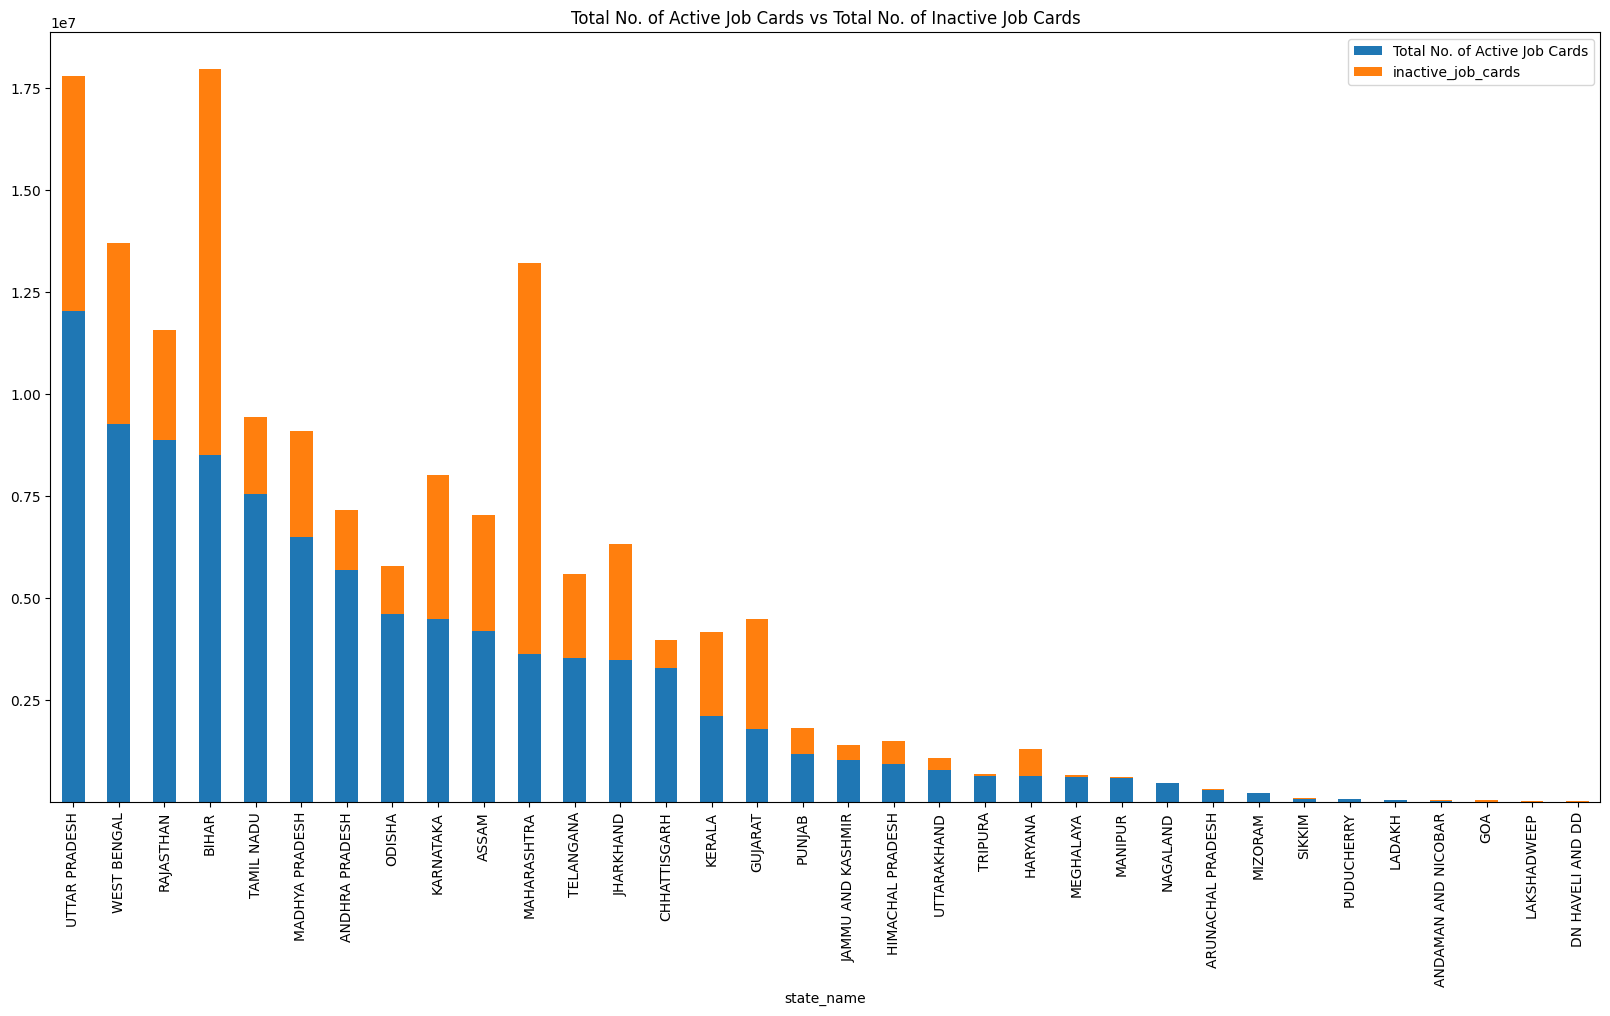

In [25]:
plot_stacked_bar(col_1 = 'Total No. of JobCards issued',
col_2 = 'Total No. of Active Job Cards',
new_col = "inactive_job_cards",
Title = "Total No. of Active Job Cards vs Total No. of Inactive Job Cards",
save_name="plots/project1/active_vs_inactive_job_cards.png")

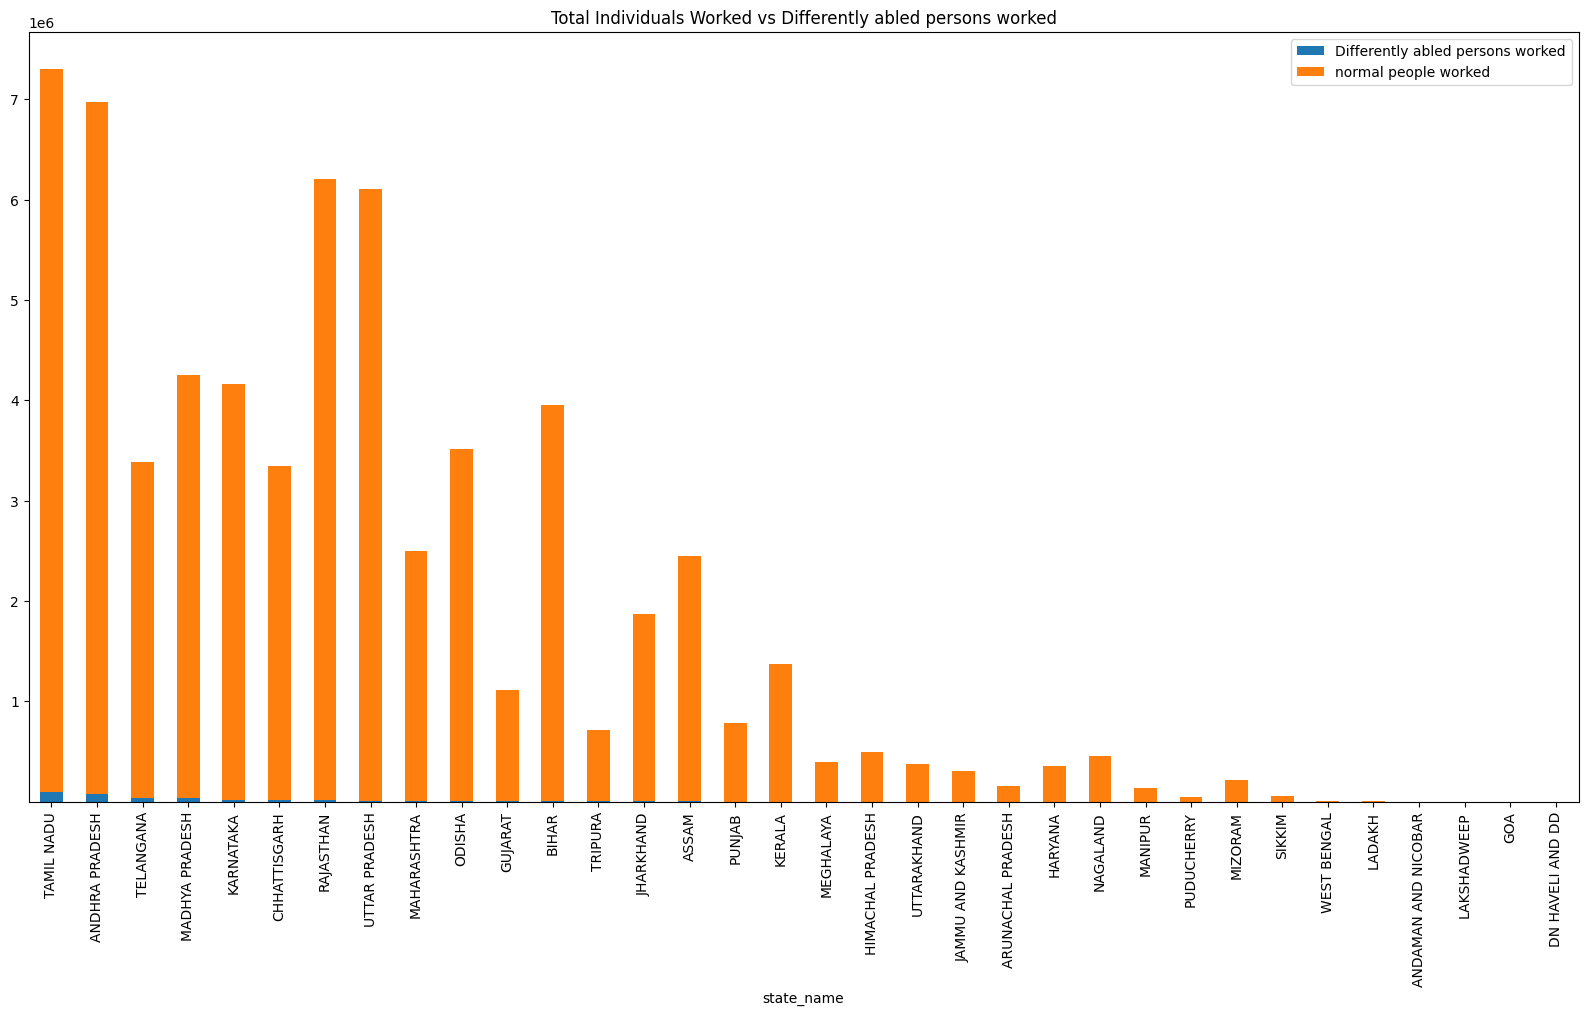

In [26]:
plot_stacked_bar(col_1 = "Total Individuals Worked",
col_2 = "Differently abled persons worked",
new_col = "normal people worked",
Title = "Total Individuals Worked vs Differently abled persons worked",
save_name="plots/project1/normal_vs_differently_abled.png")

south indian states have more "Differently abled people" in active work.

## box plot

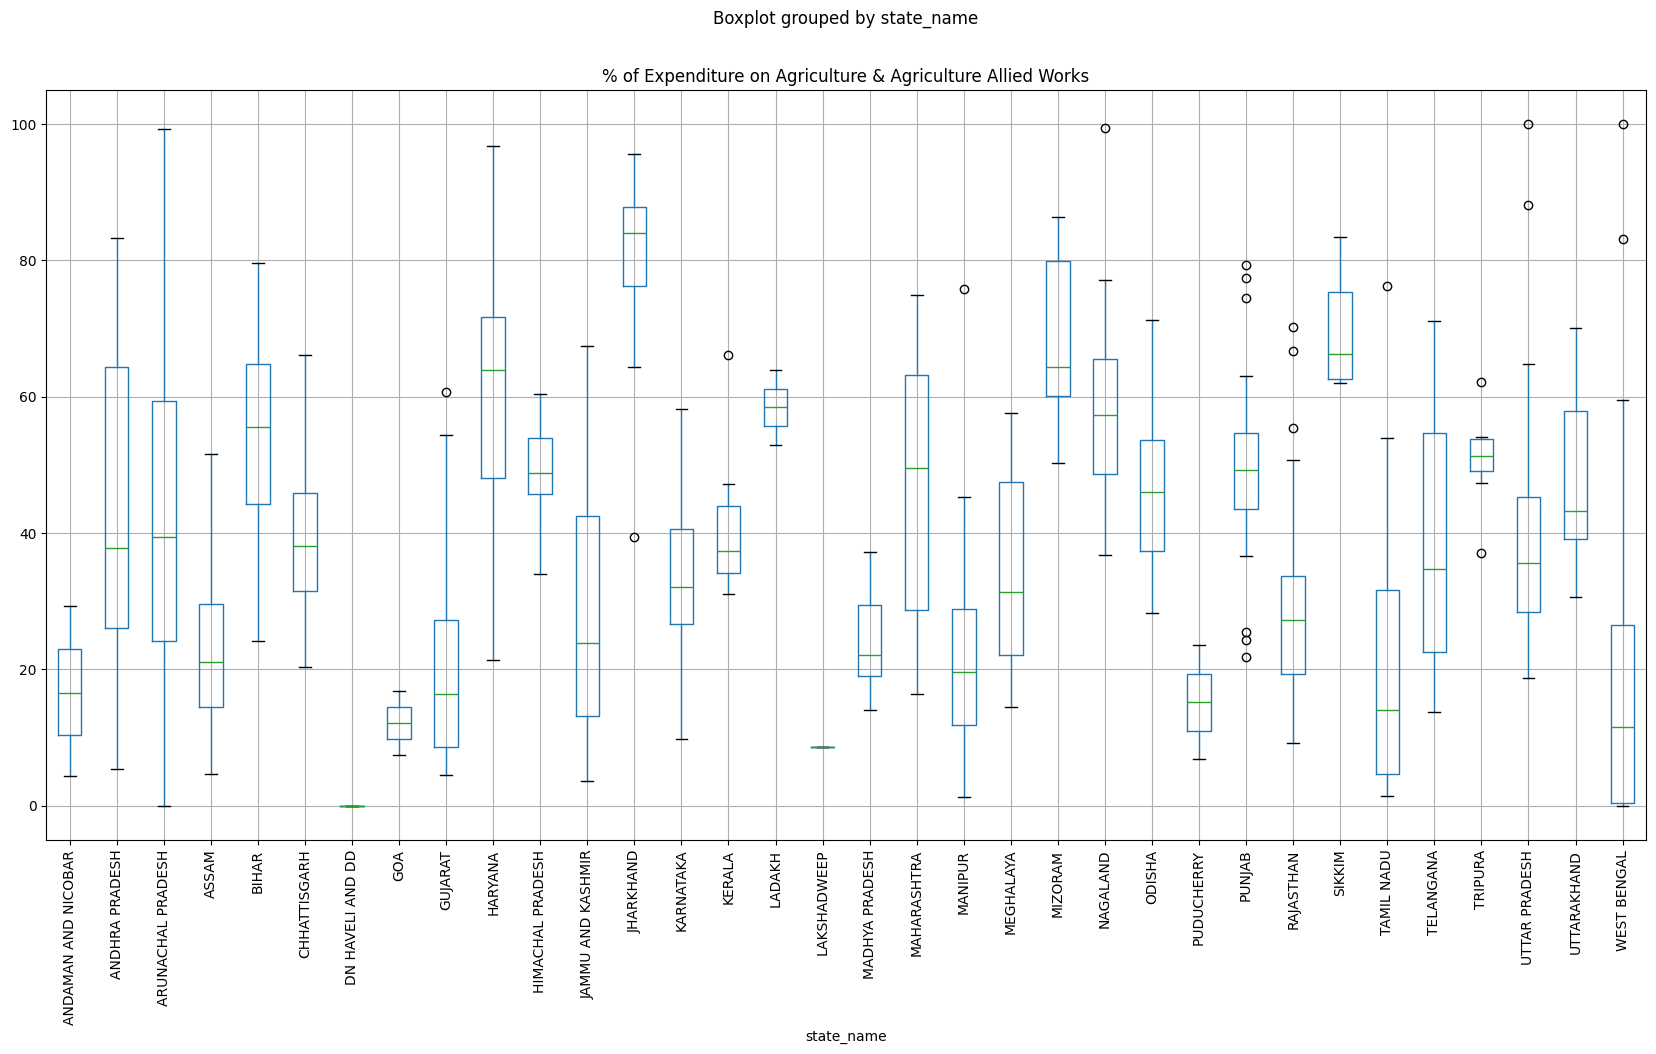

In [27]:
# % of Expenditure on Agriculture & Agriculture Allied Works

df.boxplot(column='% of Expenditure on Agriculture & Agriculture Allied Works', by='state_name', figsize=(20, 10), rot=90)
#save
plt.savefig("plots/project1/boxplot_agri.png")
plt.show()

## scatter plot

it shows that no. of workers per job cards, mostly varies between 1 - 2.5 persons in district level average.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


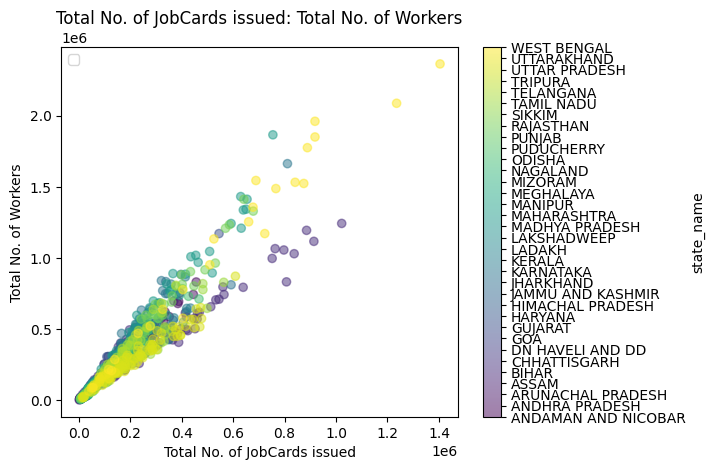

In [28]:
# <!-- Total No. of JobCards issued: Total No. of Workers -->
import numpy as np
df['state_name'] = df['state_name'].astype('category')
plt.scatter(df['Total No. of JobCards issued'], df['Total No. of Workers'], alpha=0.5,c=df['state_name'].cat.codes, cmap='viridis')

state_names = dict(df["state_name"]).values()

state_names = list(dict.fromkeys(state_names))
plt.colorbar(ticks=np.arange(len(state_names)), label='state_name').set_ticklabels(state_names)


plt.title('Total No. of JobCards issued: Total No. of Workers')

plt.xlabel('Total No. of JobCards issued')
plt.ylabel('Total No. of Workers')
plt.legend()
#save 
plt.savefig("plots/project1/jobcards_vs_workers.png")
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


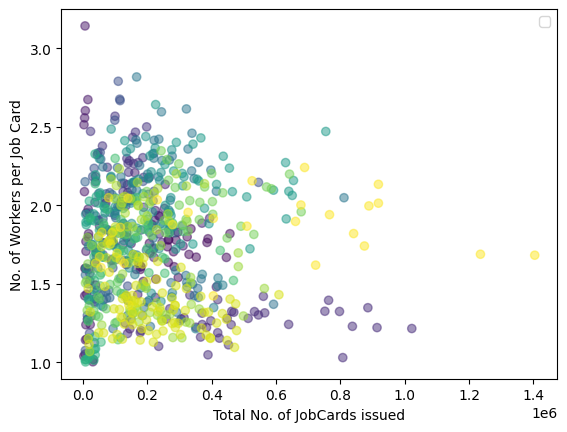

In [29]:

plt.scatter(df['Total No. of JobCards issued'],
            df['Total No. of Workers']/df["Total No. of JobCards issued"],
            alpha=0.5,
            c=df['state_name'].cat.codes, cmap='viridis')

plt.xlabel('Total No. of JobCards issued')
plt.ylabel('No. of Workers per Job Card')
plt.legend()
plt.savefig("plots/project1/jobcards_vs_workers_per_jobcard.png")
plt.show()

